<a href="https://colab.research.google.com/github/ShivamYadav09/Transformers_NLP/blob/master/SimpleTransformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Refer to article - https://medium.com/towards-artificial-intelligence/text-classification-with-simple-transformers-a29d13358135

In [1]:
#mounting drive to collab notebook to use files uplaoded to drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
!ls "/content/drive/My Drive/"

'Approximating PI using Monte Carlo.gslides'  'rev1-1 (1).gdoc'
'Colab Notebooks'			      'rev1 (1).gdoc'
 first-order-motion-model		       rev1-1.gdoc
'Machine Learning'			      'rev1 (2).gdoc'
 pi1.mp3				       rev1.gdoc
 Resume.pdf				      'Untitled spreadsheet.gsheet'


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from simpletransformers.classification import ClassificationModel, ClassificationArgs

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [2]:
train = pd.read_csv('/content/drive/My Drive/train.csv')
test  = pd.read_csv('/content/drive/My Drive/test.csv')
sample_sub  = pd.read_csv('/content/drive/My Drive/sample_submission.csv')

In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
sample_sub.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [6]:
train.drop(['id', 'keyword', 'location'], axis=1, inplace=True)
test.drop(['id', 'keyword', 'location'], axis=1, inplace=True)

In [7]:
train.isnull().sum().sum()
test.isnull().sum().sum()

0

In [8]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

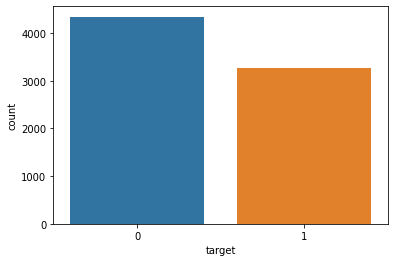

In [9]:
sns.countplot(train['target']);

In [10]:
train.columns = ['text', 'labels']

In [11]:
train_df, valid_df = train_test_split(train, test_size=0.2, stratify=train['labels'], random_state=42)

In [12]:
model_args = ClassificationArgs(num_train_epochs=1, overwrite_output_dir=True, manual_seed=42, silent=True)

model = ClassificationModel(model_type='roberta', model_name='roberta-base', use_cuda=True, num_labels=2, 
                            args=model_args)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

In [13]:
model.train_model(train_df)

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


In [14]:
result, model_outputs, wrong_preds = model.eval_model(valid_df)

In [17]:
predictions = []
for x in model_outputs:
    predictions.append(np.argmax(x))
print("f1 score", f1_score(valid_df['labels'], predictions))

f1 score 0.8064024390243903


In [19]:
test_predictions, raw_outputs = model.predict(test['text'])
sample_sub['target'] = test_predictions
sample_sub.to_csv('submission.csv',index=False)

In [22]:
type(sample_sub)

pandas.core.frame.DataFrame

In [23]:
sample_sub.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1


In [24]:
#saving the submission.csv file generated to local device (downlaods folder)
from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>